Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3) (256, 256, 3)


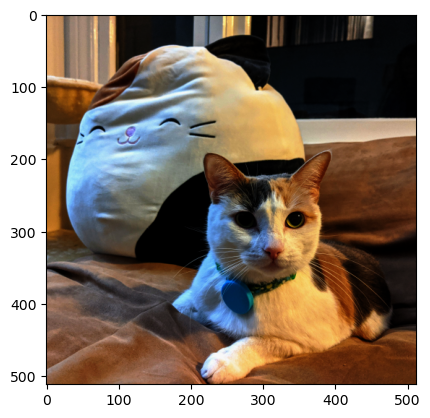

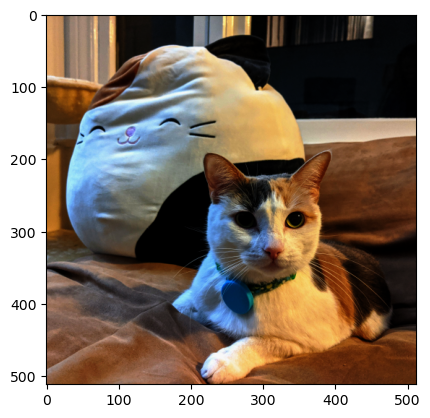

In [71]:
import pywt
import ps_lib as ps
import scipy
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt


img_path = "target-image.png"
img = ps.read_image(img_path)
print(img.shape)
LL, (LH, HL, HH) = pywt.dwt2(img, 'haar', axes = (0, 1))

img_recover = pywt.idwt2((LL, (LH, HL, HH)), 'haar', axes = (0, 1))

print(LL.shape, LH.shape, HL.shape, HH.shape)
plt.imshow(img_recover)
plt.show()

# Image recovered from the inverse idwt
plt.imshow(img)
plt.show()

Quantizing Step

In [25]:




img_path = "target-image.png"
img = ps.read_image(img_path)

# Decompose the image into luminence, color channels
img = 255 * img

R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
# y  = .299 * R + .587*G + .114*B
# cb = 128 + .168736 * R -.331264 * G + .5 * B
# cr = 128 + .5 * R -.418688 * G - .081312*B

# new_img = np.dstack([y, cb, cr]) / 255 
new_img = np.dstack([R, G, B]) / 255 
print(np.max(new_img), np.min(new_img))

coeff = scipy.fftpack.dct(scipy.fftpack.dct(new_img, axis=0, norm='ortho'), axis=1, norm='ortho')
print(coeff.shape)

# quantizing the coefficients


1.0 0.0
(512, 512, 3)
206.98297 -48.96449


In [67]:
import numpy as np

original_data = [154, 123, 123, 123, 123, 123, 123, 136, 192, 180, 136, 154, 154, 154, 136, 110, 254, 198, 154, 154, 180, 154, 123, 123, 239, 180, 136, 180, 180, 166, 123, 123, 180, 154, 136, 167, 166, 149, 136, 136, 128, 136, 123, 136, 154, 180, 198, 154, 123, 105, 110, 149, 136, 136, 180, 166, 110, 136, 123, 123, 123, 136, 154, 136]

original_data = np.array(original_data).reshape((8, 8))

T = [.3536, .3536, .3536, .3536, .3536, .3536, .3536, .3536, .4904, .4157, .2778, .0975, -.0975, -.2778, -.4157, -.4904, .4619, .1913, -.1913, -.4619, -.4619, -.1913, .1913, .4619, .4157, -.0975, -.4904, -.2778, .2778, .4904, .0975, -.4157, .3536, -.3536, -.3536, .3536, .3536, -.3536, -.3536, .3536, .2778, -.4904, .0975, .4157, -.4157, -.0975, .4904, -.2778, .1913, -.4619, .4619, -.1913, -.1913, .4619, -.4619, .1913, .0975, -.2778, .4157, -.4904, .4904, -.4157, .2778, -.0975]

T = np.reshape(T, (8,8))

M = [26, -5, -5, -5, -5, -5, -5, 8, 64, 52, 8, 26, 26, 26, 8, -18, 126, 70, 26, 26, 52, 26, -5, -5, 111, 52, 8, 52, 52, 38, -5, -5, 52, 26, 8, 39, 38, 21, 8, 8, 0, 8, -5, 8, 26, 52, 70, 26, -5, -23, -18, 21, 8, 8, 52, 38, -18, 8, -5, -5, -5, 8, 26, 8]
M = np.reshape(M, (8,8))
# matrix = np.array(data).reshape(8, 8) / 255

D = np.round(np.array(T @ M @ T.T), 1) 
print(D)


data = np.array(original_data).reshape((8, 8)) - 128


# Define quantization matrix for Qfactor of 50
q_mat=np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,103,99]])

c = np.round(np.array(D / q_mat)).astype(np.int8)
print(c)


[[162.3  40.6  20.   72.3  30.3  12.5 -19.7 -11.5]
 [ 30.5 108.4  10.5  32.3  27.7 -15.5  18.4  -2. ]
 [-94.1 -60.   12.3 -43.4 -31.3   6.1  -3.3   7.1]
 [-38.6 -83.4  -5.4 -22.2 -13.5  15.5  -1.3   3.5]
 [-31.3  17.9  -5.5 -12.4  14.3  -6.   11.5  -6. ]
 [ -0.9 -11.8  12.8   0.2  28.1  12.6   8.4   2.9]
 [  4.6  -2.4  12.2   6.6 -18.7 -12.8   7.7  12. ]
 [-10.   11.2   7.8 -16.3  21.5   0.    5.9  10.7]]
[[10  4  2  5  1  0  0  0]
 [ 3  9  1  2  1  0  0  0]
 [-7 -5  1 -2 -1  0  0  0]
 [-3 -5  0 -1  0  0  0  0]
 [-2  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


# decompression


In [70]:
r = q_mat * c
N = np.round(T.T @ r @ T) + 128
print(N)

[[149. 134. 119. 116. 121. 126. 127. 128.]
 [204. 168. 140. 144. 155. 150. 135. 125.]
 [253. 195. 155. 166. 183. 165. 131. 111.]
 [245. 185. 148. 166. 184. 160. 124. 107.]
 [188. 149. 132. 155. 172. 159. 141. 136.]
 [132. 123. 125. 143. 160. 166. 168. 171.]
 [109. 119. 126. 128. 139. 158. 168. 166.]
 [111. 127. 127. 114. 118. 141. 147. 135.]]


# JPEG the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)
(256, 256, 3)


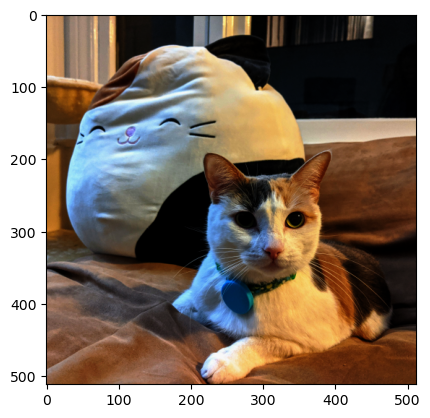

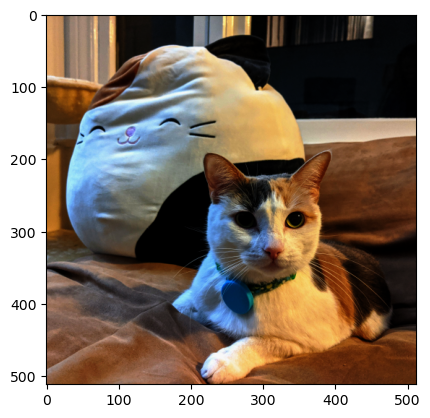

In [ ]:
img_path = "target-image.png"
img = ps.read_image(img_path)
print(img.shape)
# LL, (LH, HL, HH) = pywt.dwt2(img, 'haar', axes = (0, 1))

# img_recover = pywt.idwt2((LL, (LH, HL, HH)), 'haar', axes = (0, 1))

print(LL.shape)
# plt.imshow(img_recover)
# plt.show()

# plt.imshow(img)
# plt.show()
# plt.imshow(LH)
# plt.show()
# plt.imshow(LL)
# plt.show()
# plt.imshow(HH)
# plt.show()